In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
likes = pd.read_csv('my_top_135.csv',index_col=0)

In [3]:
likes['liked'] = 1

In [4]:
dislikes = pd.read_csv('world_top_135.csv',index_col=0)

In [5]:
dislikes['liked'] = 0

In [6]:
training_data_full = pd.concat([likes,dislikes],sort=False).reset_index()

In [7]:
training_data_full = training_data_full.drop(columns=['index'], axis=1)

In [8]:
training_data_full.head(2)

,album,artist,duration_ms,popularity,track_id,track_name,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature,liked
0,Fleet Foxes,Fleet Foxes,191493,34,2SHOE3LHVBluhe1WZ7M8ig,Sun It Rises,spotify:track:2SHOE3LHVBluhe1WZ7M8ig,0.577,0.285,7,-8.442,1,0.0319,0.576,0.06490,0.163,0.0653,112.025,audio_features,2SHOE3LHVBluhe1WZ7M8ig,spotify:track:2SHOE3LHVBluhe1WZ7M8ig,https://api.spotify.com/v1/tracks/2SHOE3LHVBlu...,https://api.spotify.com/v1/audio-analysis/2SHO...,3,1
1,It Don't Matter (feat. JoJo),Jacob Collier,261013,50,1aRvBjKgLLpIiWd1pJj14N,It Don't Matter (feat. JoJo),spotify:track:1aRvBjKgLLpIiWd1pJj14N,0.692,0.369,1,-11.970,1,0.2060,0.558,0.00139,0.101,0.5870,90.028,audio_features,1aRvBjKgLLpIiWd1pJj14N,spotify:track:1aRvBjKgLLpIiWd1pJj14N,https://api.spotify.com/v1/tracks/1aRvBjKgLLpI...,https://api.spotify.com/v1/audio-analysis/1aRv...,4,1


In [9]:
training_data_full.shape

(270, 25)

In [10]:
training_data = training_data_full._get_numeric_data()

In [11]:
features = training_data.drop(columns=['liked'], axis=1).columns

In [12]:
features

Index(['duration_ms', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

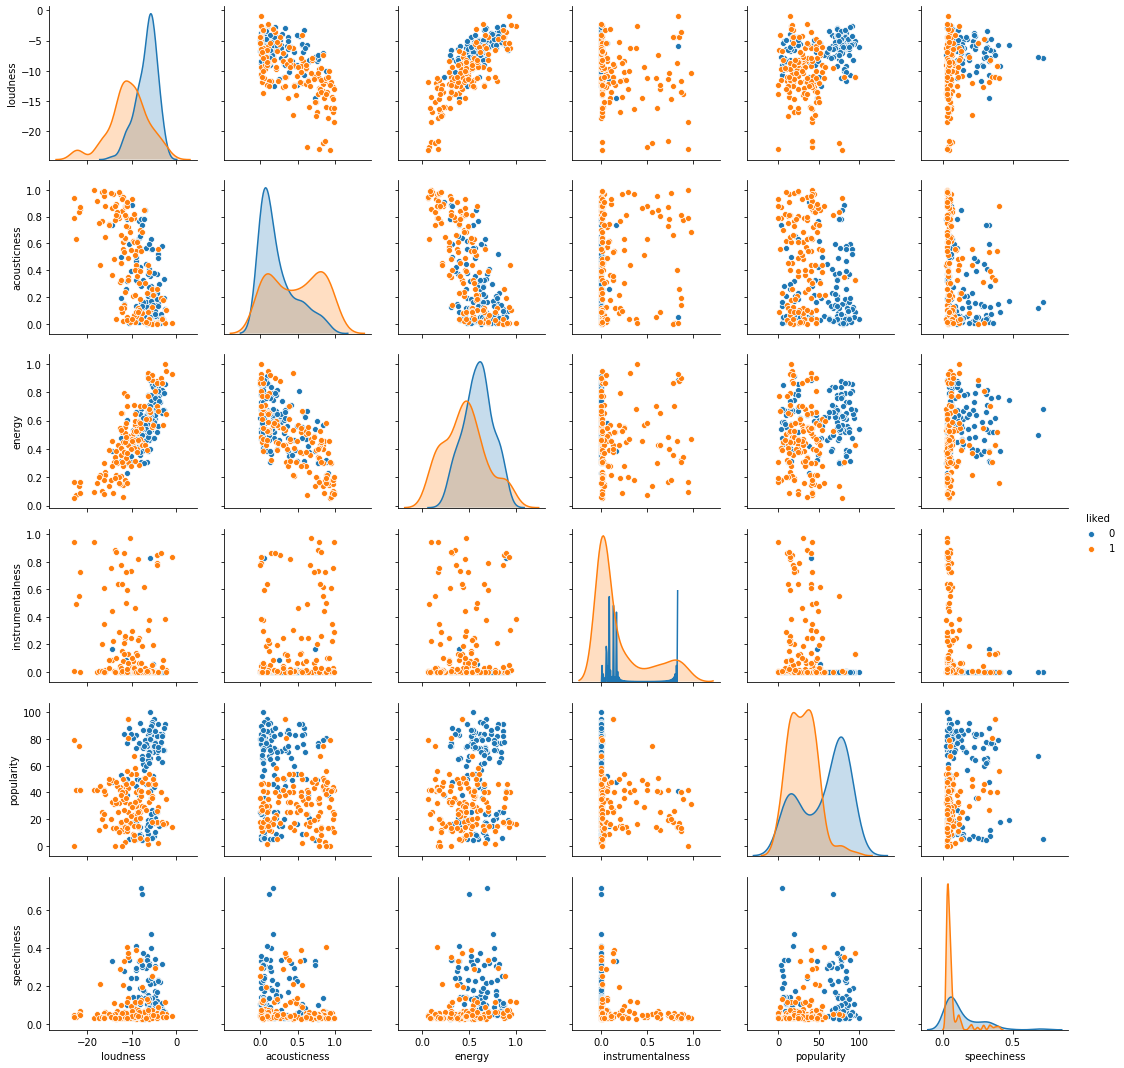

In [13]:
sns.pairplot(training_data, vars= ['loudness','acousticness','energy','instrumentalness', 'popularity','speechiness'],hue='liked')

In [14]:
mi = mutual_info_classif(training_data[features], training_data['liked'])

In [15]:
list(zip(list(features),mi))

[('duration_ms', 0.0740081118254905),
 ('popularity', 0.22645954242685074),
 ('danceability', 0.16681954152170353),
 ('energy', 0.1549187323530532),
 ('key', 0.0),
 ('loudness', 0.14603154302500432),
 ('mode', 0.0),
 ('speechiness', 0.03711999368396213),
 ('acousticness', 0.10353406747706484),
 ('instrumentalness', 0.3154403773925496),
 ('liveness', 0.013112623187053751),
 ('valence', 0.051689247037155495),
 ('tempo', 0.0),
 ('time_signature', 0.0)]

In [16]:
sc = StandardScaler()
Xsc = sc.fit_transform(training_data)
df_normalized = pd.DataFrame(Xsc, columns=training_data.columns)

In [17]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(training_data, test_size=0.2)

In [18]:
rfc = RandomForestClassifier(1000)

In [19]:
rfc.fit(train[features],train['liked'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = rfc.predict(test[features])

In [31]:
confusion_matrix(test['liked'],y_pred)

array([[22,  2],
       [ 3, 27]])

In [29]:
report = classification_report(test['liked'],y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

In [30]:
df_report

,precision,recall,f1-score,support
0,0.880000,0.916667,0.897959,24.000000
1,0.931034,0.900000,0.915254,30.000000
accuracy,0.907407,0.907407,0.907407,0.907407
macro avg,0.905517,0.908333,0.906607,54.000000
weighted avg,0.908352,0.907407,0.907568,54.000000


In [32]:
print("accuracy: %.1f%%" % (np.mean(test['liked']==y_pred)*100))

accuracy: 90.7%


In [22]:
import operator
my_list = list(zip(train[features], rfc.feature_importances_))
my_list.sort(key = operator.itemgetter(1),reverse = True)

In [23]:
my_list

[('instrumentalness', 0.26364098167300243),
 ('popularity', 0.15098992319693957),
 ('danceability', 0.1421681637509196),
 ('loudness', 0.11008922270953878),
 ('energy', 0.057803385358168285),
 ('speechiness', 0.056227916299328634),
 ('acousticness', 0.046292967380075434),
 ('valence', 0.04338392828696115),
 ('duration_ms', 0.0425912020695025),
 ('tempo', 0.03190951272491761),
 ('liveness', 0.02921876447421448),
 ('key', 0.015112903429961922),
 ('time_signature', 0.006086895624710139),
 ('mode', 0.004484233021759475)]

In [24]:
probs = rfc.predict_proba(test[features])

In [25]:
test_full = training_data_full.loc[test.index][['track_name','artist']]

In [26]:
test_full["like"], test_full["dislike"] = probs[:,1], probs[:,0]

In [27]:
test_full.sort_values(by="dislike")

,track_name,artist,like,dislike
19,Dark,Rhye,0.988000,0.012000
34,Sleep,Son Lux,0.966000,0.034000
31,Moon River,Jacob Collier,0.964000,0.036000
72,All Ashore,Punch Brothers,0.949250,0.050750
111,I Know You Know,Ásgeir,0.947000,0.053000
124,Fall Creek Boys Choir,James Blake,0.945000,0.055000
91,Familiarity,Punch Brothers,0.944333,0.055667
33,Time to Forget,Hajk,0.915000,0.085000
105,All Yours - Original Mix,Submotion Orchestra,0.900000,0.100000
83,American Death Express,Dirty Art Club,0.896000,0.104000
